In [1]:
import pandas as pd
import os
import cv2
import csv
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import h5py
from torchvision import transforms
import tensorflow as tf
from tensorflow.keras import models, layers, preprocessing, datasets

In [2]:
def imageGenerator():
    input_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\data'
    output_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\converted_data'
    datas = []
    img_size = (256,256)
    for file_name in sorted(os.listdir(input_folder)):
        if file_name.endswith('.mat'):
            file_path = os.path.join(input_folder,file_name)
            
            with h5py.File(file_path, 'r') as f:
                image = np.array(f['cjdata/image']).T
                label = int(np.array(f['cjdata/label'])[0,0])
    
            image = image.astype(np.float64)
            im_norm = 255*(image-image.min())/(image.max()-image.min())
            im_uint8 = im_norm.astype(np.uint8)

            file_name_base = os.path.splitext(file_name)[0]
            output_file_path = os.path.join(output_folder,file_name_base + '.jpg')
    
            im_pil = Image.fromarray(im_uint8)
            im_pil = im_pil.resize(img_size)
            datas.append((np.array(im_pil,dtype=np.float32),label))
            
            im_pil.save(output_file_path)
    #return datas

In [3]:
#imageGenerator()

In [4]:
def imageProcesser():
    input_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\data'
    datas = []
    img_size = (256,256)
    for file_name in sorted(os.listdir(input_folder)):
        if file_name.endswith('.mat'):
            file_path = os.path.join(input_folder,file_name)
            
            with h5py.File(file_path, 'r') as f:
                label = int(np.array(f['cjdata/label'])[0,0])-1
                tumor_border = np.array(f['cjdata/tumorBorder']).T
                tumor_mask = np.array(f['cjdata/tumorMask']).T

         
            datas.append((label))
    return datas

In [5]:
input_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\converted_data'

X = []
for file_name in sorted(os.listdir(input_folder)):
        if file_name.endswith('.jpg'):
            file_path = os.path.join(input_folder,file_name)
            
            img = preprocessing.image.load_img(file_path,target_size=(256, 256),
                                                  color_mode="grayscale")
            image_array = preprocessing.image.img_to_array(img)
            image_array = image_array/255.0

            X.append(image_array)

In [6]:
y = imageProcesser()

In [7]:
#data = pd.concat([X,pd.DataFrame()])

In [8]:
input_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\Normal'
db = 0
for file_name in sorted(os.listdir(input_folder)):
        if file_name.endswith('.jpg'):
            file_path = os.path.join(input_folder,file_name)
            
            img = preprocessing.image.load_img(file_path,target_size=(256, 256),
                                                  color_mode="grayscale")
            image_array = preprocessing.image.img_to_array(img)
            image_array = image_array/255.0
            db+=1
            X.append(image_array)
            y.append(3)
print(db)

1749


In [10]:
input_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\Recurrenceremnant'
db = 0
for file_name in sorted(os.listdir(input_folder)):
        if file_name.endswith('.jpg'):
            file_path = os.path.join(input_folder,file_name)
            
            img = preprocessing.image.load_img(file_path,target_size=(256, 256),
                                                  color_mode="grayscale")
            image_array = preprocessing.image.img_to_array(img)
            image_array = image_array/255.0
            db += 1
            X.append(image_array)
            y.append(5)
print(db)

114


In [11]:
input_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\Stroke_Haemorrhage'
db = 0
for file_name in sorted(os.listdir(input_folder)):
        if file_name.endswith('.jpg'):
            file_path = os.path.join(input_folder,file_name)
            
            img = preprocessing.image.load_img(file_path,target_size=(256, 256),
                                                  color_mode="grayscale")
            image_array = preprocessing.image.img_to_array(img)
            image_array = image_array/255.0
            db += 1
            X.append(image_array)
            y.append(6)
print(db)

564


In [12]:
input_folder = r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\Stroke_infarct'
db = 0
for file_name in sorted(os.listdir(input_folder)):
        if file_name.endswith('.jpg'):
            file_path = os.path.join(input_folder,file_name)
            
            img = preprocessing.image.load_img(file_path,target_size=(256, 256),
                                                  color_mode="grayscale")
            image_array = preprocessing.image.img_to_array(img)
            image_array = image_array/255.0
            db += 1
            X.append(image_array)
            y.append(7)
print(db)

906


In [13]:
labels = ['meningioma', 'glioma', 'pituitary tumor','nothing']

In [14]:
datageneration = preprocessing.image.ImageDataGenerator(
    rotation_range=20,       # forgatás (fokban)
    width_shift_range=0.1,   # vízszintes eltolás
    height_shift_range=0.1,  # függőleges eltolás
    zoom_range=0.1,          # nagyítás/kicsinyítés
    horizontal_flip=True,    # vízszintes tükrözés
    fill_mode='nearest'  
)

In [15]:
X = np.array(X, dtype="float32")
y = np.array(y, dtype="int")

In [16]:
print("x len: ",len(X))
print("y len: ",len(y))

x len:  6397
y len:  6397


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
print("x len: ",len(X_test))
print("y len: ",len(y_test))

x len:  2112
y len:  2112


In [19]:
model = models.Sequential() 
model.add(layers.Input(shape=(256, 256, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(8,activation='softmax')) # Többosztályos osztályozás (pl. glioma, meningeoma, stb.)


In [20]:
print("x len: ",len(X_test))
print("y len: ",len(y_test))

x len:  2112
y len:  2112


In [21]:
train_generated = datageneration.flow(X_train,y_train,batch_size=32)

In [22]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(train_generated, epochs=40, validation_data=(X_test,y_test))

C:\Users\marto\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 66s 483ms/step - accuracy: 0.3306 - loss: 2.0021 - val_accuracy: 0.5942 - val_loss: 1.1131
Epoch 2/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 64s 477ms/step - accuracy: 0.5444 - loss: 1.1155 - val_accuracy: 0.6089 - val_loss: 0.9052
Epoch 3/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 65s 482ms/step - accuracy: 0.5948 - loss: 0.9934 - val_accuracy: 0.6193 - val_loss: 0.9191
Epoch 4/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 64s 479ms/step - accuracy: 0.5997 - loss: 0.9706 - val_accuracy: 0.6127 - val_loss: 0.8854
Epoch 5/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 65s 482ms/step - accuracy: 0.6019 - loss: 0.9524 - val_accuracy: 0.6373 - val_loss: 0.8675
Epoch 6/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 64s 479ms/step - accuracy: 0.6062 - loss: 0.9106 - val_accuracy: 0.6610 - val_loss: 0.8473
Epoch 7/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 65s 483ms/step - accuracy: 0.6223 - loss: 0.8892 - val_accuracy: 0.6539 - val_loss: 0.8100
Epoch 8/40
134/134 ━━━━━━━━━━━━━━━━━━━━ 64s 479ms/step - accuracy: 0.6173 - loss: 0

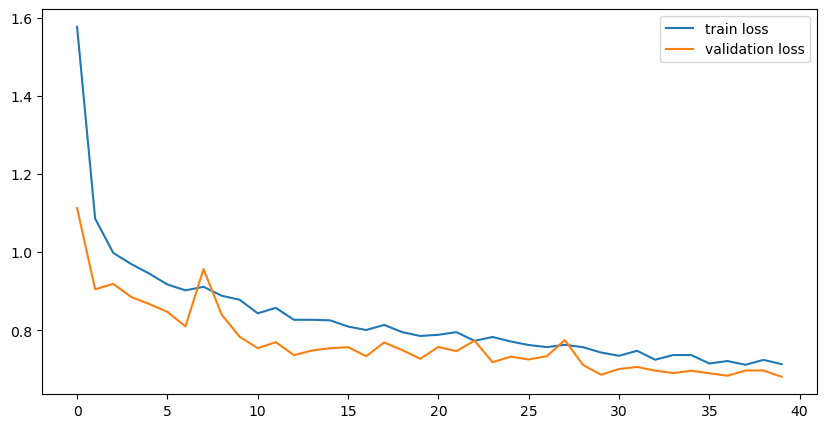

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [24]:
import joblib as jl
model.save('C:/Users/marto/Desktop/Thesis/backend/models/BrainTumorClassificationModel.h5')
jl.dump(history,'C:/Users/marto/Desktop/Thesis/backend/models/BrainTumorClassificationHistory.pkl')

['C:/Users/marto/Desktop/Thesis/backend/models/BrainTumorClassificationHistory.pkl']

In [25]:
img = np.expand_dims(X[1],axis=0)
print ("Type:", type(img))
print("Shape:", img.shape)
print("Min:", img.min(), "Max:", img.max())
print("Dtype:", img.dtype)

Type: <class 'numpy.ndarray'>
Shape: (1, 256, 256, 1)
Min: 0.0 Max: 1.0
Dtype: float32


In [26]:
pred = model.predict(img)
pred_class = np.argmax(pred,axis=1).tolist()
pred_prob = np.max(pred)
print(f"Predikált osztály: {pred_class}, valószínűség: {pred_prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predikált osztály: [0], valószínűség: 0.85


In [27]:
pred = model.predict(np.expand_dims(X[0],axis=0))
pred_class = np.argmax(pred,axis=1).tolist()
pred_prob = np.max(pred)
print(f"Predikált osztály: {pred_class}, valószínűség: {pred_prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predikált osztály: [0], valószínűség: 0.92


In [28]:
pred = model.predict(np.expand_dims(X[2],axis=0))
pred_class = np.argmax(pred,axis=1).tolist()
pred_prob = np.max(pred)
print(f"Predikált osztály: {pred_class}, valószínűség: {pred_prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predikált osztály: [0], valószínűség: 0.77


In [29]:
pred = model.predict(np.expand_dims(X[3],axis=0))
pred_class = np.argmax(pred,axis=1).tolist()
pred_prob = np.max(pred)
print(f"Predikált osztály: {pred_class}, valószínűség: {pred_prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predikált osztály: [2], valószínűség: 0.97


In [30]:
y[1]

0

In [31]:
y[21]

2

In [32]:
sorted(os.listdir(input_folder))[:10]


['43085531.jpg',
 '43085547.jpg',
 '43085563.jpg',
 '43085579.jpg',
 '43085595.jpg',
 '43085611.jpg',
 '43085627.jpg',
 '43085643.jpg',
 '43085659.jpg',
 '43085675.jpg']

In [33]:
sorted(os.listdir(r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\data'))[:10]

['.ipynb_checkpoints',
 '1.mat',
 '10.mat',
 '100.mat',
 '1000.mat',
 '1001.mat',
 '1002.mat',
 '1003.mat',
 '1004.mat',
 '1005.mat']

0


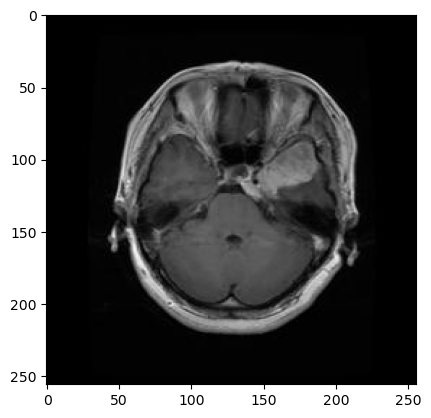

In [34]:
print(y[0])
img = cv2.imread(r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\converted_data\1.jpg')
plt.imshow(img,cmap='gray')
plt.show()

0


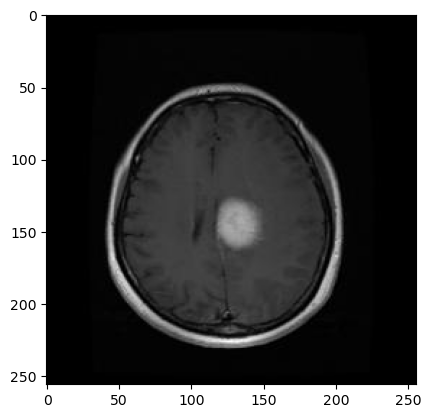

In [35]:
print(y[1])
img = cv2.imread(r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\converted_data\10.jpg')
plt.imshow(img,cmap='gray')
plt.show()

0


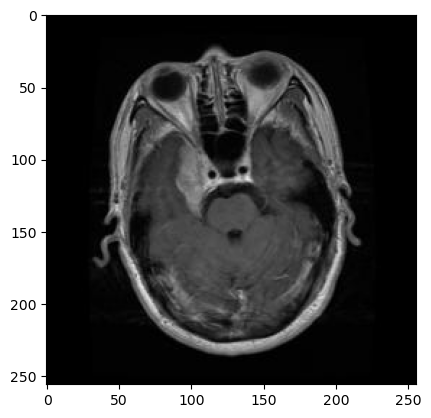

In [36]:
print(y[2])
img = cv2.imread(r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\converted_data\100.jpg')
plt.imshow(img,cmap='gray')
plt.show()

2


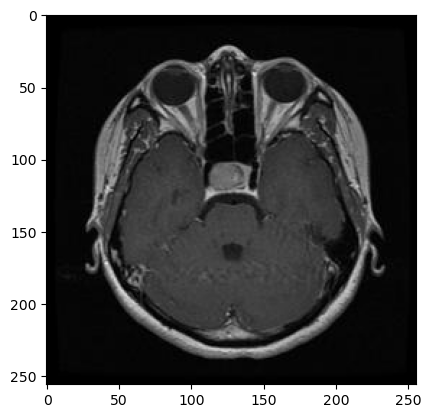

In [37]:
print(y[3])
img = cv2.imread(r'C:\Users\marto\Desktop\Szakdolgozat\pogram\brainTumor\converted_data\1000.jpg')
plt.imshow(img,cmap='gray')
plt.show()

In [38]:
print("x len: ",len(X_test))
print("y len: ",len(y_test))

x len:  2112
y len:  2112


In [39]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

from sklearn.metrics import accuracy_score, classification_report

print("Pontosság:", accuracy_score(y_test, predicted_classes))
print("\nRészletes riport:\n", classification_report(y_test, predicted_classes))

66/66 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step
Pontosság: 0.7045454545454546

Részletes riport:
               precision    recall  f1-score   support

           0       0.78      0.62      0.69       218
           1       0.85      0.92      0.89       477
           2       0.92      0.94      0.93       327
           3       0.57      0.86      0.69       557
           5       0.22      0.10      0.14        39
           6       0.53      0.34      0.41       213
           7       0.50      0.18      0.27       281

    accuracy                           0.70      2112
   macro avg       0.63      0.57      0.57      2112
weighted avg       0.69      0.70      0.68      2112



In [40]:
y[4500]

3

In [41]:
pred = model.predict(np.expand_dims(X[4500],axis=0))
pred_class = np.argmax(pred,axis=1).tolist()
pred_prob = np.max(pred)
print(f"Predikált osztály: {pred_class}, valószínűség: {pred_prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predikált osztály: [3], valószínűség: 0.47


In [42]:
#np.save('C:/Users/marto/Desktop/Thesis/backend/brainTumor_y_test.npy',y_test)

In [43]:
len(y_test)

2112

In [44]:
#np.save('C:/Users/marto/Desktop/Thesis/backend/brainTumor_X_test.npy', X_test)  


In [45]:
len(X_test)

2112

In [46]:
len(X)

6397